In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
#matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('..'))
from modules import io
import modules.vascular_data as sv
import modules.sv_image as sv_image
from medpy.metric.binary import dc,hd,assd
from tqdm import tqdm

In [2]:
user_fn = './UQ/user_data/C.npy'

C = np.load(user_fn,allow_pickle=True)
print(C.shape)

(308, 3)


In [3]:
Nx = C.shape[0]
Nc = 3

In [4]:
W = 160
SPACING = 0.029
ORIGIN = 0

rows = []

for i in tqdm(range(Nx)):
    for j in range(Nc):
        dd = []
        rr = []
        
        c = C[i,j]
        seg   = sv.contourToSeg(c,[ORIGIN]*2,[W]*2,[SPACING]*2)
        
        for k in range(Nc):
            if j==k: continue
            c2 = C[i,k]
            seg_t = sv.contourToSeg(c2,[ORIGIN]*2,[W]*2,[SPACING]*2)

            r = np.sqrt(np.sum(seg)*1.0/np.pi)*SPACING
            d = dc(seg,seg_t)
            h = hd(seg,seg_t)*SPACING
            a = assd(seg,seg_t)*SPACING
            
            data = {
                "row":i,
                "ref":j,
                "comp":k,
                "DICE":d,
                "HD":h,
                "ASSD":a,
                "radius":r
            }
        
            rows.append(data)

100%|██████████| 308/308 [00:17<00:00, 17.61it/s]


In [5]:
df = pd.DataFrame(rows)
df.to_csv('./UQ/user_data/user.csv')

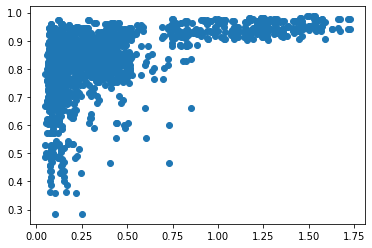

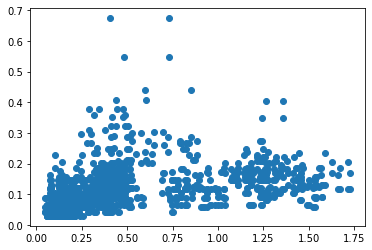

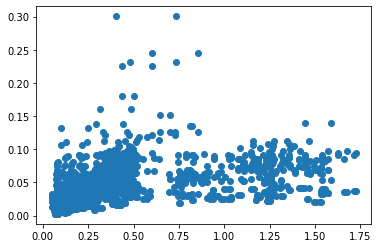

In [7]:
df = df.loc[df['HD']<1.5]
df = df.loc[df['ASSD']<1.5]

plt.figure()
plt.plot(df['radius'],df['DICE'],linestyle='',marker='o')
plt.show()
plt.close()

plt.figure()
plt.plot(df['radius'],df['HD'],linestyle='',marker='o')
plt.show()
plt.close()

plt.figure()
plt.plot(df['radius'],df['ASSD'],linestyle='',marker='o')
plt.show()
plt.close()